<a href="https://colab.research.google.com/github/Yureeets/Digit-Recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
import tensorflow as tf


from sklearn.model_selection import train_test_split


# **Dataset**

In [ ]:
dataset = pd.read_csv('train.csv')
labels = dataset['label'].values.reshape(-1,1) # Get the labels
dataset = dataset.values


In [ ]:
def reshape_row(row):
    return row[1:].reshape(28, 28)

# Apply the reshape_row function to each row
reshaped_matrices = np.array([reshape_row(row) for row in dataset])

In [ ]:
reshaped_matrices.shape

(42000, 28, 28)

In [ ]:
np.set_printoptions(linewidth = 250)
reshaped_matrices[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 141, 202, 254, 193,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 165, 254, 179, 163, 249, 244,  72,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 135, 254, 150,   0,   0, 189, 254, 243,  31

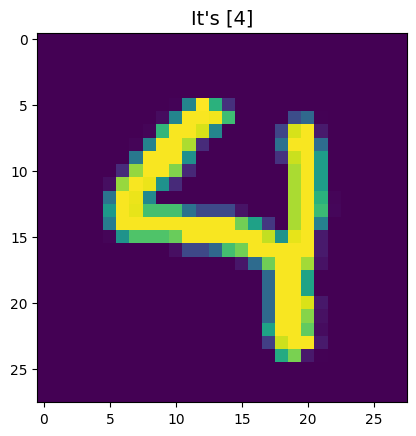

In [ ]:
idx = 1124

plt.title(f'It\'s {labels[idx]}',fontsize = 14)
plt.imshow(reshaped_matrices[idx])
plt.show()

# **Split the Data into Test and Training sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_matrices,labels,test_size = 0.2, random_state = 42)

# **Normalize Data**

In [ ]:
def reshape_and_normalize(images):

    shape = images.shape

    images = np.reshape(images,(shape[0],shape[1],shape[2],1))


    images = images / 255.0

    return images
X_train = reshape_and_normalize(X_train)
X_test = reshape_and_normalize(X_test)

In [ ]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# **Create the model**

In [ ]:
digit_recognition = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),

    tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)

])

digit_recognition.compile(optimizer = tf.optimizers.legacy.Adam(),
                          loss = 'sparse_categorical_crossentropy',
                          metrics=['accuracy'])

In [ ]:
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
      if logs.get('accuracy') > 0.99:
          print('We got needed accuracy')
          self.model.stop_training = True

In [ ]:


digit_recognition.fit(x = X_train, y = y_train,epochs = 15,callbacks = [MyCallBack()])

Epoch 1/15
1050/1050 [==============================] - 35s 33ms/step - loss: 0.1649 - accuracy: 0.9486
Epoch 2/15
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0512 - accuracy: 0.9837
Epoch 3/15
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0317 - accuracy: 0.9893
Epoch 4/15
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0284 - accuracy: 0.9911


In [ ]:
digit_recognition.evaluate(X_test,y_test)

263/263 [==============================] - 2s 9ms/step - loss: 0.0597 - accuracy: 0.9818


[0.05973690375685692, 0.9817857146263123]

# **Load the Test Data**

In [ ]:
# unzip the file

import zipfile

file_to_unzip = 'test.csv.zip'

zip = zipfile.ZipFile(file_to_unzip,'r')
zip.extractall('/')

zip.close()


In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def reshape_test_row(row):
    return row[:].reshape(28, 28)

reshaped_test_matrix = np.array([reshape_row(row) for row in dataset])

In [ ]:
reshaped_test_matrix.shape

(42000, 28, 28)

In [ ]:
final_test_matrix = reshape_and_normalize(reshaped_test_matrix)
final_test_matrix

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

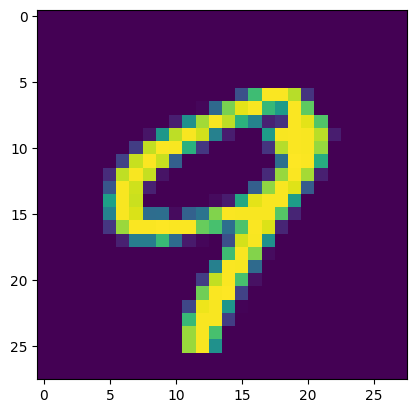

In [ ]:
plt.imshow(final_test_matrix[100])

1/1 [==============================] - 0s 101ms/step


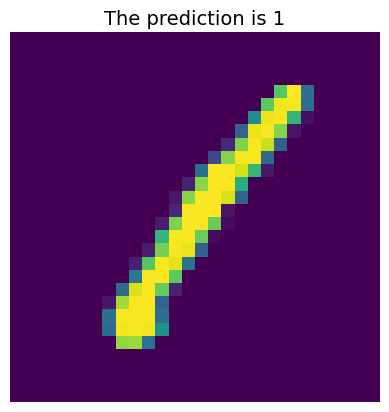

In [ ]:
def recognize(image_idx):
    image = final_test_matrix[image_idx]
    image_reshaped = image.reshape(1, 28, 28, 1)
    label = digit_recognition.predict(image_reshaped).argmax(axis=1)[0]

    plt.title(f'The prediction is {label}', fontsize=14)
    plt.imshow(image)
    plt.axis('off')

    plt.show()

image_to_recognize = 0
recognize(image_to_recognize)

In [ ]:
final_test_matrix.shape

(42000, 28, 28, 1)

# **Load The Results**

In [ ]:
output = pd.DataFrame({'ImageId': range(len(final_test_matrix)), 'Label': digit_recognition.predict(final_test_matrix).argmax(axis=1)[0]})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

1313/1313 [==============================] - 92s 70ms/step
Your submission was successfully saved!


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = horse_or_human_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")


In [ ]:
from google.colab import runtime
runtime.unassign()